# Module 6. Labs regression analysis

In [223]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [224]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


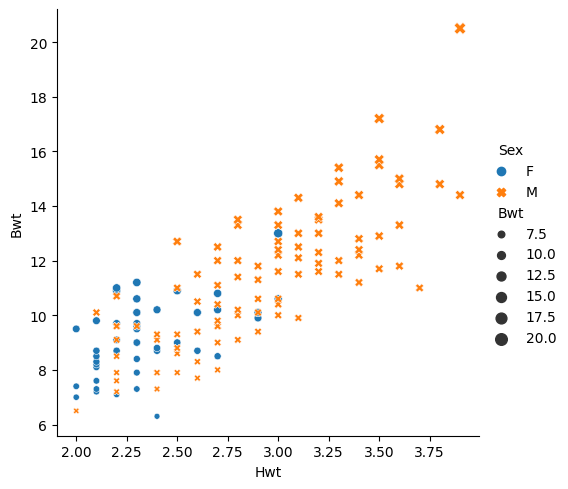

In [225]:
sns.relplot(data=cats, x='Hwt', y='Bwt', size='Bwt', hue='Sex', style='Sex')

3. Calculate and draw the regression line.


<Axes: xlabel='Hwt', ylabel='Bwt'>

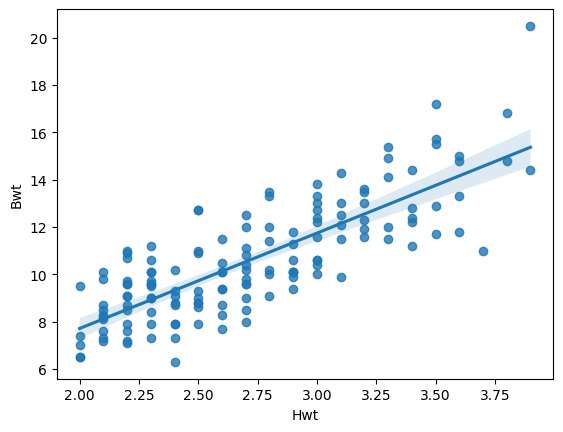

In [226]:
sns.regplot(data=cats, x='Hwt', y='Bwt')

In [227]:
from sklearn.linear_model import LinearRegression

x = cats.Hwt.values.reshape(-1,1)
y = cats.Bwt

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -0.35 + 4.03 x


4. Calculate the correlation coefficient and the coefficient of determination.

In [228]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

R = 0.804134787315513
R² = 0.6466327561709654


5. Interpret the results from the previous steps.

In [229]:
# R ~ 0.8 => een stijgend verband want R > 0 en er is een zeer sterk verband tussen Hwt en Bwt (want 0.8)
# R² ~ 0.64 => een sterk verband + 64% van de variantie in Bwt wordt verklaard door Hwt (de onafhankelijke variabele)

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [230]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


In [231]:
cats_male = cats[cats.Sex == 'M']
cats_female = cats[cats.Sex == 'F']
cats_male.describe()

,ID,Hwt,Bwt
count,97.000000,97.000000,97.000000
mean,96.134021,2.900000,11.321649
std,28.269031,0.467484,2.540556
min,48.000000,2.000000,6.500000
25%,72.000000,2.500000,9.400000
50%,96.000000,2.900000,11.400000
75%,121.000000,3.200000,12.800000
max,144.000000,3.900000,20.500000


2. Draw a scatter plot of both variables for each gender.


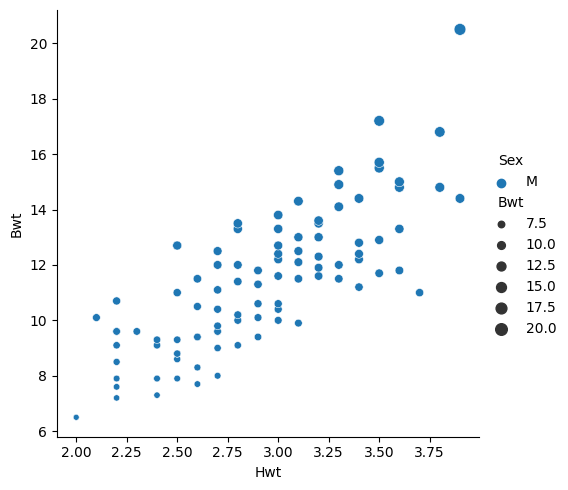

In [232]:
sns.relplot(data=cats_male, x='Hwt', y='Bwt', size='Bwt', hue='Sex', style='Sex')

3. Calculate and draw the regression line.


<Axes: xlabel='Hwt', ylabel='Bwt'>

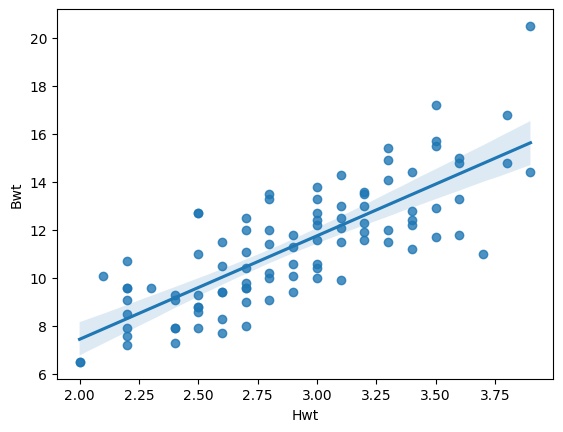

In [233]:
sns.regplot(data=cats_male, x='Hwt', y='Bwt')

In [234]:
from sklearn.linear_model import LinearRegression

x = cats_male.Hwt.values.reshape(-1,1)
y = cats_male.Bwt

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -1.18 + 4.31 x


4. Calculate the correlation coefficient and the coefficient of determination.


In [235]:
cor = np.corrcoef(cats_male.Hwt, cats_male.Bwt)[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

R = 0.7930443171812304
R² = 0.628919289013444


5. Interpret the results from the previous steps.

In [236]:
# R ~ 0.79 => een stijgend verband want R > 0 en er is een zeer sterk verband tussen Hwt en Bwt (want 0.8)
# R² ~ 0.62 => een sterk verband + 63% van de variantie in Bwt wordt verklaard door Hwt (de onafhankelijke variabele)

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

Source: Departement Landbouw en Visserij op basis van StatBel

In [237]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";")
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [238]:
farms.dtypes

year                           int64
number_of_farms                int64
average_area_per_farm_(ha)    object
dtype: object

3. Change the datatype of 'average_area_per_farm_(ha)' to float.

In [239]:
farms['average_area_per_farm_(ha)'] = farms['average_area_per_farm_(ha)'].str.replace(',', '.').astype(float)

4. Draw a scatter plot of the number of farms versus the year.


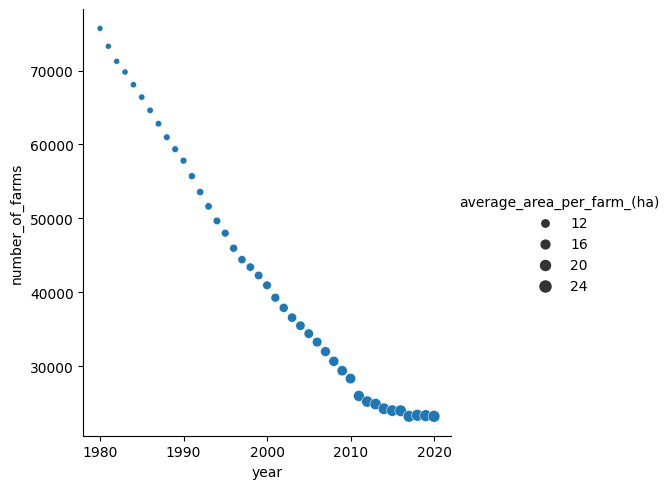

In [240]:
sns.relplot(data=farms, x='year', y='number_of_farms', size='average_area_per_farm_(ha)')

5. Is there a positive / negative relationship between year and number_of_farms?

R = -0.9861066349492859

In [241]:
cor = np.corrcoef(farms.year, farms.number_of_farms)[0][1]
print(f"R = { cor }")

# R ~ -0.99 => een dalend verband (minder boerderijen naarmate de tijd verder gaat) want R < 0 en er is een zeer sterk verband tussen year en number_of_farms (want 0.99)

R = -0.9861066349492859


6. Is there a strong relationship between year and 'number_of_farms'?

R² = 0.9724062954910041

In [242]:
print(f"R² = {cor ** 2}")

# R² ~ 0.98 => een zeer sterk verband + 97% van de variantie in number_of_farms wordt verklaard door year (de onafhankelijke variabele)

R² = 0.9724062954910041


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

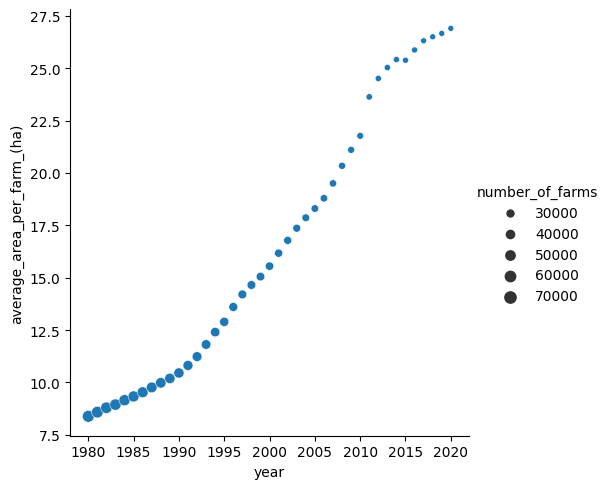

In [243]:
sns.relplot(data=farms, x='year', y='average_area_per_farm_(ha)', size='number_of_farms')

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [244]:
from sklearn.linear_model import LinearRegression

x = farms.year.values.reshape(-1,1)
y = farms['average_area_per_farm_(ha)']

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

Regression line: ŷ = -1031.90 + 0.52 x


In [245]:
model.predict([[2035]])[0]

34.91987804878045

8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

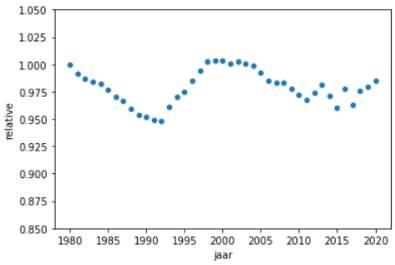


In [246]:
farms['total_area'] = farms['number_of_farms'] * farms['average_area_per_farm_(ha)']
farms.head()

,year,number_of_farms,average_area_per_farm_(ha),total_area
0,1980,75706,8.38,634416.28
1,1981,73292,8.58,628845.36
2,1982,71255,8.79,626331.45
3,1983,69807,8.94,624074.58
4,1984,68083,9.15,622959.45


In [247]:
area_1980 = farms[farms.year == 1980]['total_area'][0]

In [248]:
farms["area_relative_to_1980"] = farms['total_area'] / area_1980
farms.head()

,year,number_of_farms,average_area_per_farm_(ha),total_area,area_relative_to_1980
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


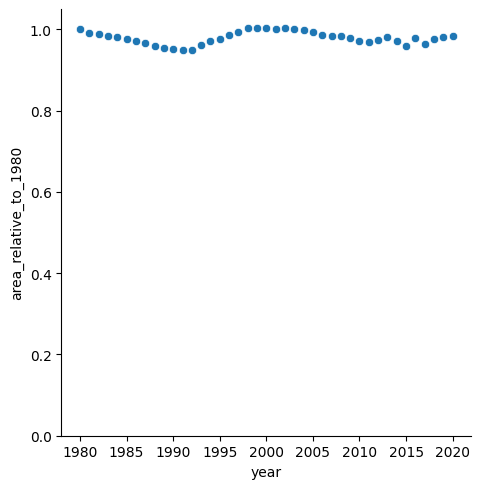

In [249]:
p = sns.relplot(data=farms, x='year', y='area_relative_to_1980')
p.set(ylim=(0, 1.05))

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [250]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [251]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [252]:
for c in cols_with_dollars:
  movies[c] = movies[c].str.replace('$', '').str.replace(' ', '').astype(float) / 1000000

C:\Users\jaspe\AppData\Local\Temp\ipykernel_15700\2009503138.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[c] = movies[c].str.replace('$', '').str.replace(' ', '').astype(float) / 1000000


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

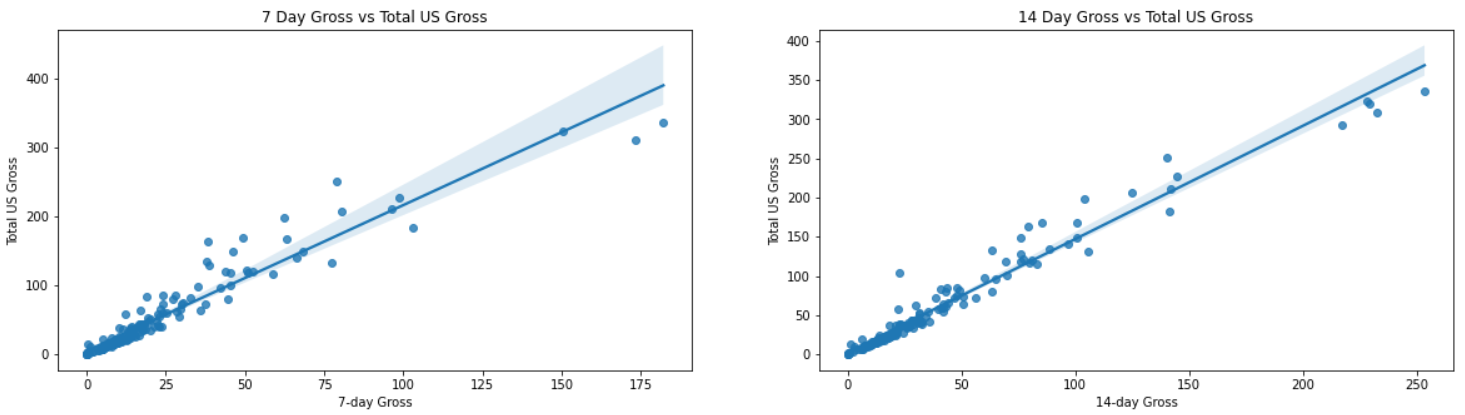

Text(0.5, 1.0, '14-day Gross vs Total US Gross')

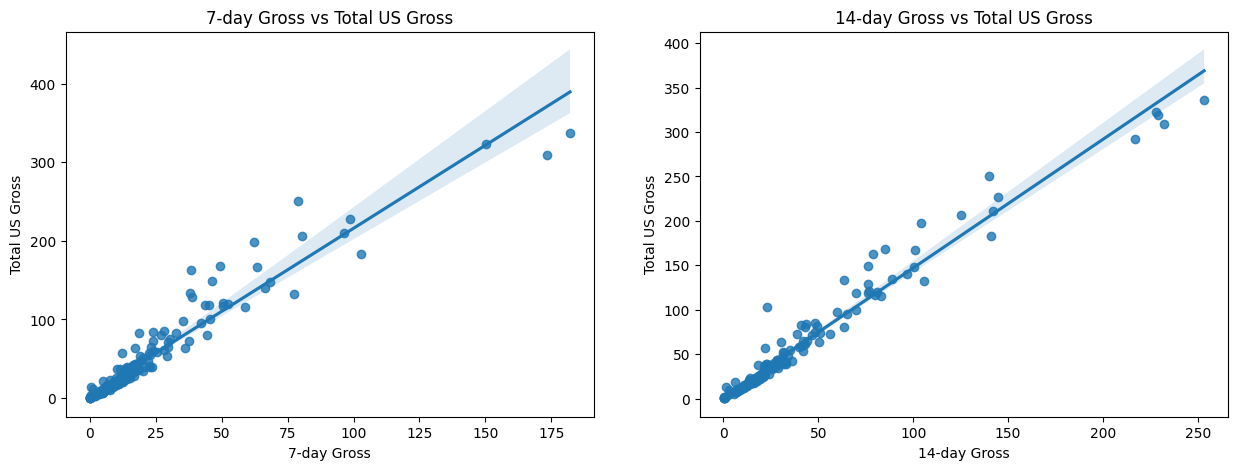

In [253]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(data=movies, x='7-day Gross', y='Total US Gross', ax=axs[0])
axs[0].set_title('7-day Gross vs Total US Gross')
sns.regplot(data=movies, x='14-day Gross', y='Total US Gross', ax=axs[1])
axs[1].set_title('14-day Gross vs Total US Gross')

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [254]:
extra_7_day_gross = movies.dropna(subset=['7-day Gross', 'Total US Gross'])
extra_7_day_gross.head()

extra_14_day_gross = movies.dropna(subset=['14-day Gross', 'Total US Gross'])
extra_14_day_gross.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
8,9.0,Ghost Rider,Sony Pictures,Action,58.960097,83.257376,115.802596,121.900000,103.699106,120.0


In [255]:
cor = np.corrcoef(extra_7_day_gross['7-day Gross'], extra_7_day_gross['Total US Gross'])[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

# R ~ 0.95 => een stijgend verband want R > 0 en er is een zeer sterk verband tussen 7-day Gross en Total US Gross (want 0.95)
# R² ~ 0.92 => een zeer sterk verband tussen de opbrengst in de eerste week en de totale opbrengst 
# + 92% van de variantie in Total US Gross wordt verklaard door 7-day Gross (de onafhankelijke variabele)

R = 0.9594075444143062
R² = 0.920462836279089


In [256]:
cor = np.corrcoef(extra_14_day_gross['14-day Gross'], extra_14_day_gross['Total US Gross'])[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

# R ~ 0.98 => een stijgend verband want R > 0 en er is een zeer sterk verband tussen 14-day Gross en Total US Gross (want 0.98)
# R² ~ 0.96 => een zeer sterk verband tussen de opbrengst in de eerste week en de totale opbrengst 
# + 96% van de variantie in Total US Gross wordt verklaard door 14-day Gross (de onafhankelijke variabele)

R = 0.9813238689021968
R² = 0.9629965356771759


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [257]:
from sklearn.linear_model import LinearRegression

x = extra_7_day_gross['7-day Gross'].values.reshape(-1,1)
y = extra_7_day_gross['Total US Gross']

model1 = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model1.intercept_:.2f} + {model1.coef_[0]:.2f} x")
# ook als de film de eerste week 0 dollar opbrengt, zal de film nog steeds 4.59M dollar opbrengen

Regression line: ŷ = 4.59 + 2.11 x


In [258]:
from sklearn.linear_model import LinearRegression

x = extra_14_day_gross['14-day Gross'].values.reshape(-1,1)
y = extra_14_day_gross['Total US Gross']

model2 = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model2.intercept_:.2f} + {model2.coef_[0]:.2f} x")

Regression line: ŷ = 2.45 + 1.45 x


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

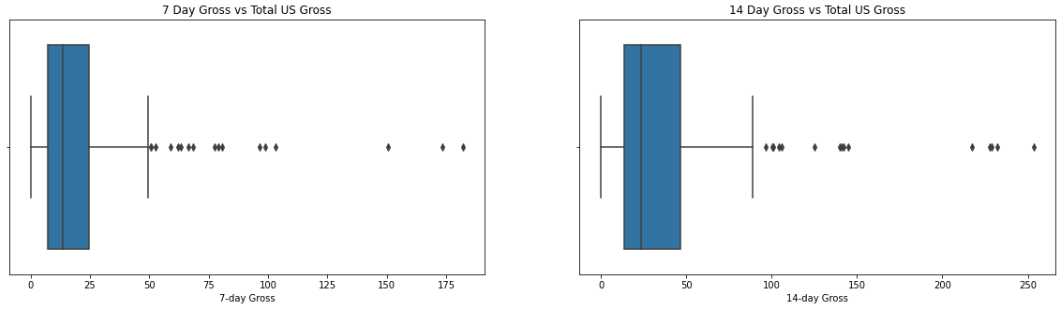

<Axes: xlabel='7-day Gross'>

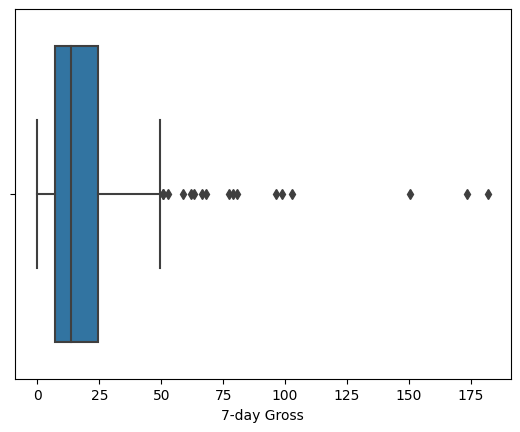

In [259]:
sns.boxplot(data=extra_7_day_gross, x='7-day Gross')

<Axes: xlabel='14-day Gross'>

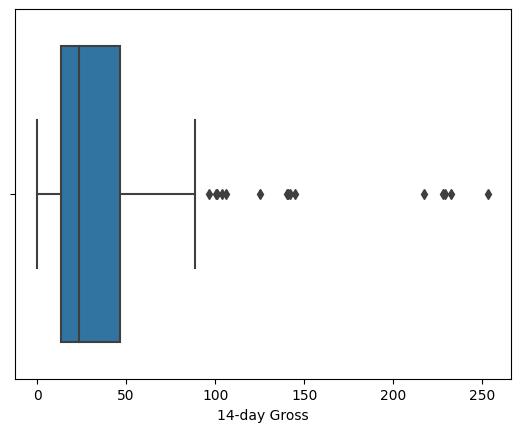

In [260]:
sns.boxplot(data=extra_14_day_gross, x='14-day Gross')

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [261]:
q1 = extra_7_day_gross['7-day Gross'].quantile(0.25)
print(f"Q1 = {q1}")
q3 = extra_7_day_gross['7-day Gross'].quantile(0.75)
print(f"Q3 = {q3}")
iqr = q3 - q1
print(f"IQR = {iqr}")
lower_bound = q1 - 1.5 * iqr
print(f"Lower bound = {lower_bound}")
upper_bound = q3 + 1.5 * iqr
print(f"Upper bound = {upper_bound}")

Q1 = 7.1859547500000005
Q3 = 24.462228
IQR = 17.27627325
Lower bound = -18.728455124999996
Upper bound = 50.376637875


In [262]:
q1_14 = extra_14_day_gross['14-day Gross'].quantile(0.25)
print(f"Q1 = {q1_14}")
q3_14  = extra_14_day_gross['14-day Gross'].quantile(0.75)
print(f"Q3 = {q3_14}")
iqr_14  = q3_14 - q1_14
print(f"IQR = {iqr_14}")
lower_bound_14  = q1_14 - 1.5 * iqr_14
print(f"Lower bound = {lower_bound_14}")
upper_bound_14  = q3_14 + 1.5 * iqr_14
print(f"Upper bound = {upper_bound_14}")

Q1 = 13.555127
Q3 = 46.649346
IQR = 33.094219
Lower bound = -36.0862015
Upper bound = 96.2906745


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

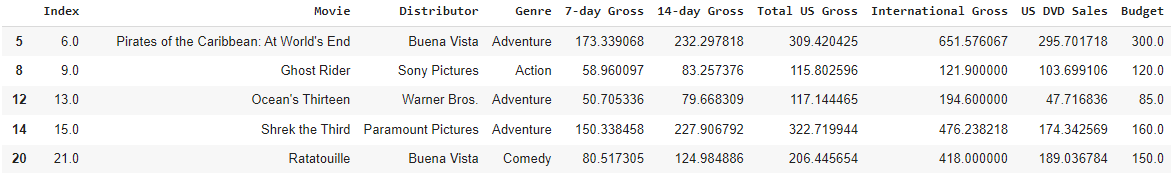

In [263]:
extra_7_day_gross[extra_7_day_gross['7-day Gross'] > upper_bound]
extra_14_day_gross[extra_14_day_gross['14-day Gross'] > upper_bound_14]

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0
28,29.0,The Bourne Ultimatum,Universal,Action,98.673300,144.820320,227.471070,214.690492,123.288965,130.0
32,33.0,Fantastic Four: Rise of the Silver Surfer,20th Century Fox,Action,77.453559,105.800808,131.921738,156.293581,62.251422,120.0
35,36.0,Casino Royale,MGM,Action,63.267784,100.763154,167.365000,429.000000,79.665820,102.0
37,38.0,The Transformers,Paramount Pictures,Action,NaN,228.950080,319.246193,389.026399,290.541120,151.0
60,61.0,Spider-Man 3,Sony Pictures,Adventure,182.070572,253.357629,336.530303,554.341323,123.997036,258.0
104,105.0,The Simpsons Movie,20th Century Fox,Comedy,102.949705,141.112342,183.135014,343.936008,96.337909,72.5
118,119.0,Night at the Museum,20th Century Fox,Comedy,79.055249,140.096754,250.863268,323.617573,153.286880,110.0


* 6.4 Remove the outliers out of the dataset.

In [264]:
extra_7_day_gross = extra_7_day_gross[extra_7_day_gross['7-day Gross'] < upper_bound]
extra_14_day_gross = extra_14_day_gross[extra_14_day_gross['14-day Gross'] < upper_bound_14]

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [265]:
cor = np.corrcoef(extra_7_day_gross['7-day Gross'], extra_7_day_gross['Total US Gross'])[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

# R ~ 0.93 => een stijgend verband want R > 0 en er is een zeer sterk verband tussen 7-day Gross en Total US Gross (want 0.99)
# R² ~ 0.86 => een zeer sterk verband tussen de opbrengst in de eerste week en de totale opbrengst 
# + 86% van de variantie in Total US Gross wordt verklaard door 7-day Gross (de onafhankelijke variabele)

R = 0.9324792650689286
R² = 0.8695175797834893


In [266]:
cor = np.corrcoef(extra_14_day_gross['14-day Gross'], extra_14_day_gross['Total US Gross'])[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

# R ~ 0.93 => een stijgend verband want R > 0 en er is een zeer sterk verband tussen 7-day Gross en Total US Gross (want 0.99)
# R² ~ 0.86 => een zeer sterk verband tussen de opbrengst in de eerste week en de totale opbrengst 
# + 86% van de variantie in Total US Gross wordt verklaard door 7-day Gross (de onafhankelijke variabele)

R = 0.9584258717658027
R² = 0.9185801516700389


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

In [267]:
from sklearn.linear_model import LinearRegression

x = extra_7_day_gross['7-day Gross'].values.reshape(-1,1)
y = extra_7_day_gross['Total US Gross']

model1 = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model1.intercept_:.2f} + {model1.coef_[0]:.2f} x")


Regression line: ŷ = -5.07 + 2.75 x


In [268]:
from sklearn.linear_model import LinearRegression

x = extra_14_day_gross['14-day Gross'].values.reshape(-1,1)
y = extra_14_day_gross['Total US Gross']

model2 = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model2.intercept_:.2f} + {model2.coef_[0]:.2f} x")

Regression line: ŷ = -3.23 + 1.65 x


## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  
(a) Make the following plot  

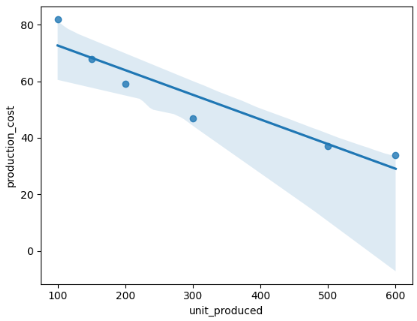

(b) Based on this plot  
(b.1) Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
(b.2) Can you decide whether the relationship between number of units produced and production costis weak / strong.  
(b.3) Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
(c) What is the production cost for the 400th unit?  
(d) How much loss will the company incur if not a single unit is produced?  
(e) How much does it cost in total to produce 1000 units  


Some answers  
(c) the 400th unit costs 46.5051  
(d) loss when no unit produced 81.392  
(e) total cost for 1000 units 37739.8969

In [269]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

,unit_produced,production_cost
0,100,82
1,150,68
2,200,59
3,300,47
4,500,37
5,600,34


<Axes: xlabel='unit_produced', ylabel='production_cost'>

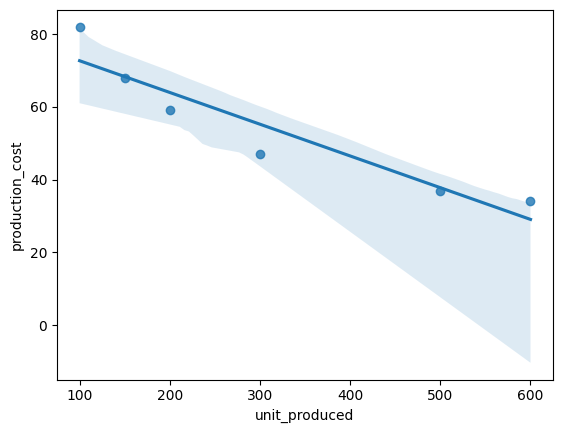

In [270]:
sns.regplot(data=df, x='unit_produced', y='production_cost')

In [271]:
# b.1 Een dalend verband tussen unit_produced en production_cost want de rechte is dalend
# b.2 Sterk verband omdat de punten dicht bij de rechte liggen
# b.3 de waarde van R ligt in het inverval [-1, -0.5]

In [272]:
cor = np.corrcoef(df.unit_produced, df.production_cost)[0][1]
print(f"R = { cor }")

R = -0.9395115809338715


In [273]:
# C
from sklearn.linear_model import LinearRegression

x = df.unit_produced.values.reshape(-1,1)
y = df.production_cost

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

Regression line: ŷ = 81.39 + -0.09 x


In [274]:
print(f"De 400ste eenheid kost {model.predict([[400]])[0]:.2f} euro")

De 400ste eenheid kost 46.51 euro
